Average Accuracy: 0.8166969147005445


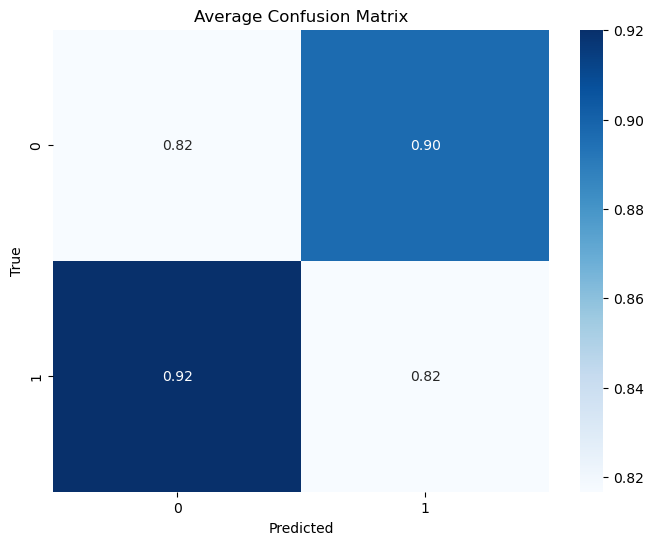

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))

# Iterate over each row, using it as the test data
for index, row in data.iterrows():
    # Set the current row as the test data
    X_test = row[features].values.reshape(1, -1)
    X_test_df = pd.DataFrame(X_test, columns=features)  # Set the feature names
    y_test = np.array([ylog[index]])

    # Use the rest of the data for training
    X_train = data.drop(index)[features]
    X_train.columns = features  # Set the feature names
    y_train = data.drop(index)['Acceptable']

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test_df)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

# Calculate average accuracy
average_accuracy = total_accuracy / len(data)

# Calculate average confusion matrix
average_conf_matrix = total_conf_matrix / len(data)

# Display average accuracy
print('Average Accuracy:', average_accuracy)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


Average Accuracy: 0.8415


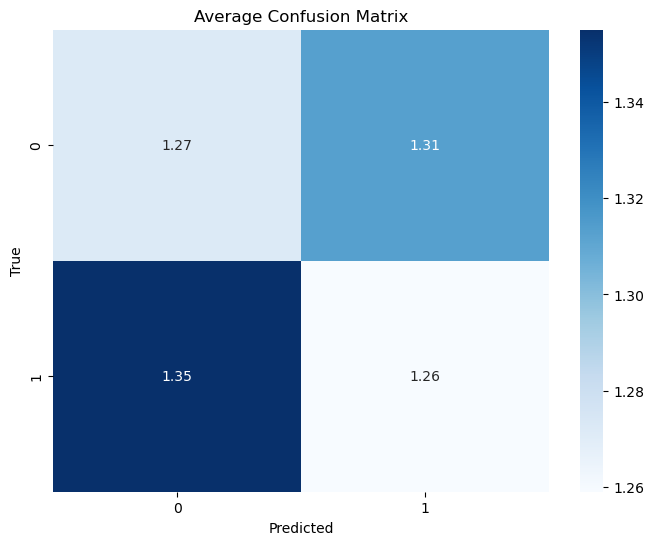

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))

# Initialize KFold with 5 splits
kf = KFold(n_splits=1000)

# Iterate over the 5 folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

# Calculate average accuracy
average_accuracy = total_accuracy / kf.get_n_splits()

# Calculate average confusion matrix
average_conf_matrix = total_conf_matrix / kf.get_n_splits()

# Display average accuracy
print('Average Accuracy:', average_accuracy)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


Average Accuracy: 0.8056617647058821
Average Precision: 0.8546431812702626
Average Recall: 0.8056617647058821
Average F1 Score: 0.7985526234866864


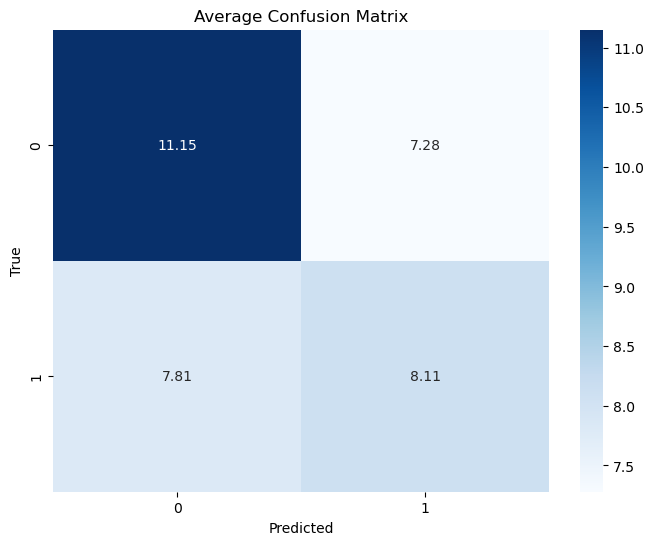

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))
total_precision = 0
total_recall = 0
total_f1_score = 0

# Initialize KFold with 100 splits
kf = KFold(n_splits=100)

# Iterate over the 100 folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

    # Calculate precision, recall, and f1-score for each class
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    total_precision += class_report['weighted avg']['precision']
    total_recall += class_report['weighted avg']['recall']
    total_f1_score += class_report['weighted avg']['f1-score']

# Calculate average metrics
average_accuracy = total_accuracy / kf.get_n_splits()
average_conf_matrix = total_conf_matrix / kf.get_n_splits()
average_precision = total_precision / kf.get_n_splits()
average_recall = total_recall / kf.get_n_splits()
average_f1_score = total_f1_score / kf.get_n_splits()

# Display average metrics
print('Average Accuracy:', average_accuracy)
print('Average Precision:', average_precision)
print('Average Recall:', average_recall)
print('Average F1 Score:', average_f1_score)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


Accuracy: 0.8217522658610272
Confusion Matrix:
[[225  25]
 [ 34  47]]


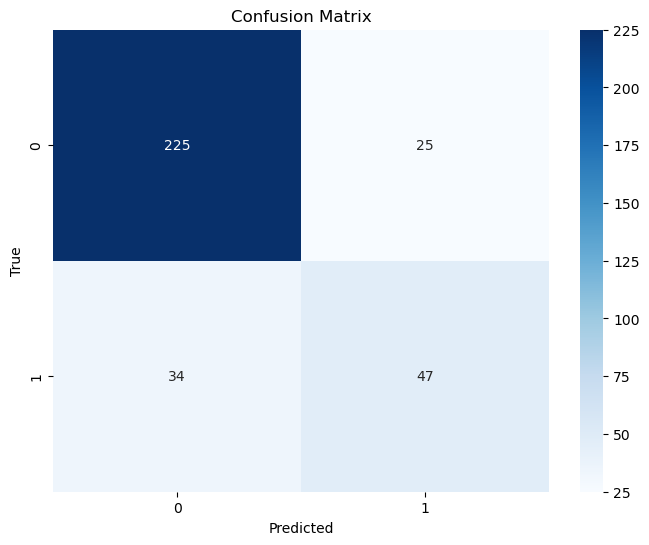

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, ylog, test_size=0.2, random_state=42)

# Fit the model using the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Average Accuracy: 0.8056617647058821


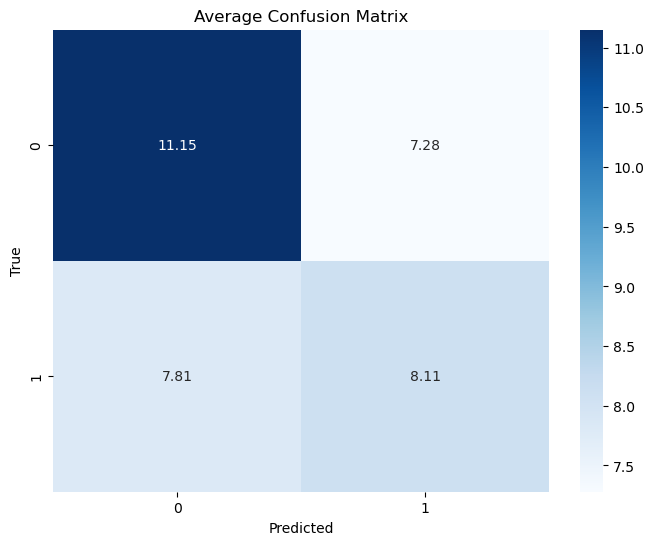

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize KFold with 100 splits
kf = KFold(n_splits=100)

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))

# Iterate over the 100 folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

# Calculate average metrics
average_accuracy = total_accuracy / kf.get_n_splits()
average_conf_matrix = total_conf_matrix / kf.get_n_splits()

# Display average metrics
print('Average Accuracy:', average_accuracy)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


Average Accuracy: 0.8056617647058821
Total Confusion Matrix:
[[1115.  728.]
 [ 781.  811.]]


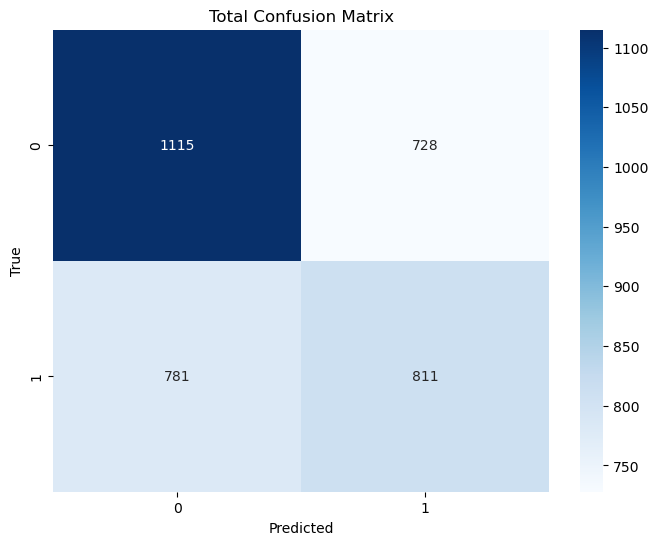

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Initialize KFold with 100 splits
kf = KFold(n_splits=100)

# Initialize variables to store overall evaluation metrics
total_accuracy = 0
total_conf_matrix = np.zeros((2, 2))

# Iterate over the 100 folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

    # Initialize the logistic regression model
    logreg = LogisticRegression(max_iter=1000)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracy += accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    total_conf_matrix += conf_matrix

# Calculate average metrics
average_accuracy = total_accuracy / kf.get_n_splits()

# Display average accuracy
print('Average Accuracy:', average_accuracy)

# Display total confusion matrix
print('Total Confusion Matrix:')
print(total_conf_matrix)

# Plot average Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(total_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Total Confusion Matrix')
plt.show()


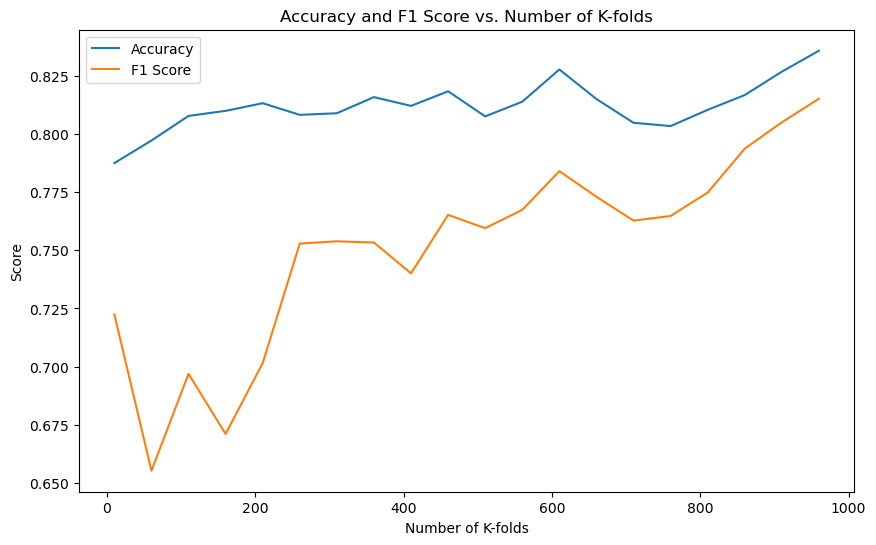

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Range of K-fold values
kfold_values = range(10, 1001, 50)

accuracy_scores = []
f1_scores = []

for n_splits in kfold_values:
    kf = KFold(n_splits=n_splits)

    total_accuracy = 0
    total_f1_score = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

        f1 = f1_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter
        total_f1_score += f1

    average_accuracy = total_accuracy / kf.get_n_splits()
    average_f1_score = total_f1_score / kf.get_n_splits()

    accuracy_scores.append(average_accuracy)
    f1_scores.append(average_f1_score)

# Plotting accuracy and F1 score
plt.figure(figsize=(10, 6))
plt.plot(kfold_values, accuracy_scores, label='Accuracy')
plt.plot(kfold_values, f1_scores, label='F1 Score')
plt.xlabel('Number of K-folds')
plt.ylabel('Score')
plt.legend()
plt.title('Accuracy and F1 Score vs. Number of K-folds')
plt.show()


Utilizing K-fold cross-validation (KFold) is a common practice in machine learning for evaluating the performance and generalizability of a model. KFold helps in assessing how the model will perform on an independent dataset in practice. Here's what it accomplishes:

1. **Better Estimation of Performance**: It provides a more reliable estimate of the model's performance compared to using a single train-test split. By using multiple splits and averaging the results, you reduce the risk that your evaluation is biased by a particular random split.

2. **Utilizes the Entire Dataset**: KFold ensures that every sample in the dataset gets to be part of a training set exactly once and a test set K-1 times. This maximizes the use of available data for both training and testing.

3. **Reduces Variance in Performance Estimate**: The use of multiple splits helps to reduce the variance in the evaluation metrics. This is important because the performance of a model can vary significantly depending on the specific samples in the training and test sets.

4. **Provides Insights into Model Sensitivity**: KFold can help you understand how sensitive your model's performance is to the choice of training data. If the model's performance varies greatly across different folds, it might indicate that the model is sensitive to the data it's trained on.

5. **Helps Tune Hyperparameters**: When combined with techniques like grid search or random search, KFold allows you to tune hyperparameters effectively. You can evaluate the model's performance for each hyperparameter combination across different folds and choose the best-performing one.

In summary, KFold cross-validation is a valuable tool for assessing the performance of a machine learning model in a more robust and unbiased manner, providing insights into how the model might perform on unseen data. It's especially useful for small datasets or when data is expensive or difficult to collect.

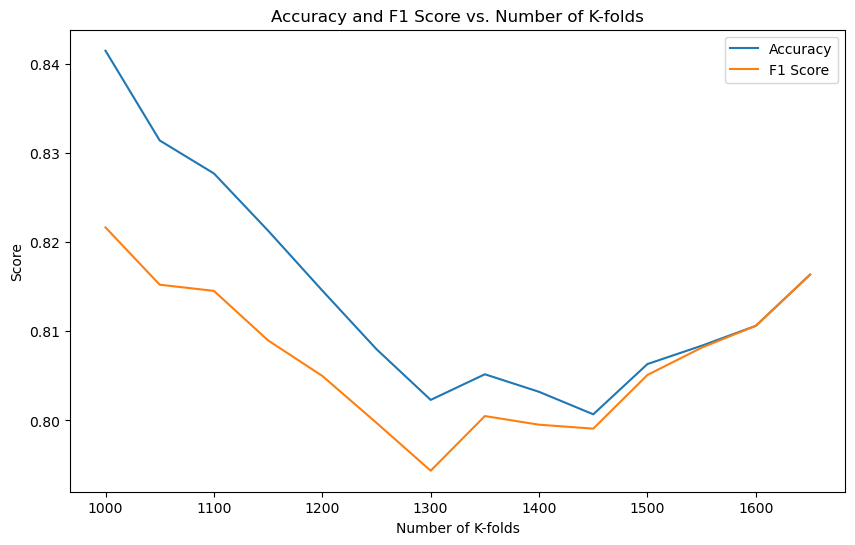

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Range of K-fold values
kfold_values = range(1000, 1700, 50)

accuracy_scores = []
f1_scores = []

for n_splits in kfold_values:
    kf = KFold(n_splits=n_splits)

    total_accuracy = 0
    total_f1_score = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

        f1 = f1_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter
        total_f1_score += f1

    average_accuracy = total_accuracy / kf.get_n_splits()
    average_f1_score = total_f1_score / kf.get_n_splits()

    accuracy_scores.append(average_accuracy)
    f1_scores.append(average_f1_score)

# Plotting accuracy and F1 score
plt.figure(figsize=(10, 6))
plt.plot(kfold_values, accuracy_scores, label='Accuracy')
plt.plot(kfold_values, f1_scores, label='F1 Score')
plt.xlabel('Number of K-folds')
plt.ylabel('Score')
plt.legend()
plt.title('Accuracy and F1 Score vs. Number of K-folds')
plt.show()


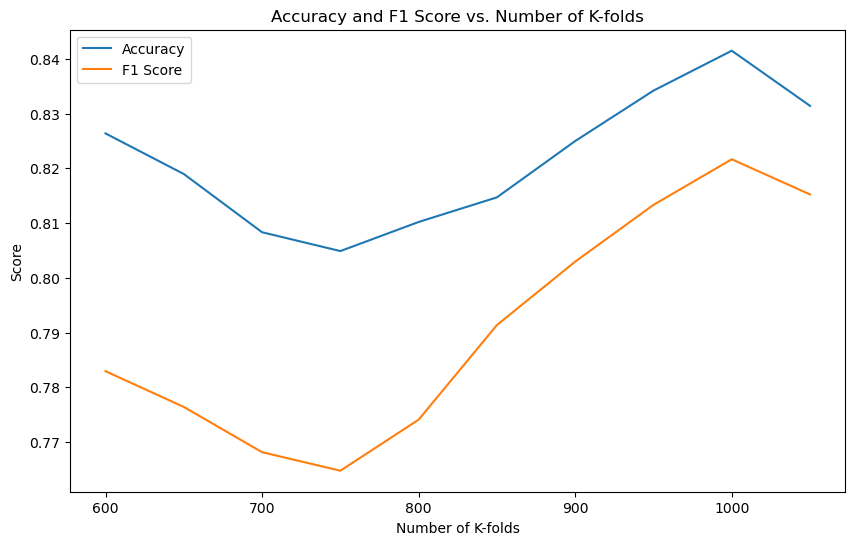

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = pd.DataFrame(data[features], columns=features)  # Features

# Assume 'target_column' is the name of your target variable
ylog = data['Acceptable']  # Target variable

# Range of K-fold values
kfold_values = range(600, 1051, 50)

accuracy_scores = []
f1_scores = []

for n_splits in kfold_values:
    kf = KFold(n_splits=n_splits)

    total_accuracy = 0
    total_f1_score = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = ylog.iloc[train_index], ylog.iloc[test_index]

        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

        f1 = f1_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter
        total_f1_score += f1

    average_accuracy = total_accuracy / kf.get_n_splits()
    average_f1_score = total_f1_score / kf.get_n_splits()

    accuracy_scores.append(average_accuracy)
    f1_scores.append(average_f1_score)

# Plotting accuracy and F1 score
plt.figure(figsize=(10, 6))
plt.plot(kfold_values, accuracy_scores, label='Accuracy')
plt.plot(kfold_values, f1_scores, label='F1 Score')
plt.xlabel('Number of K-folds')
plt.ylabel('Score')
plt.legend()
plt.title('Accuracy and F1 Score vs. Number of K-folds')
plt.show()
